In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import re
from datetime import datetime
import calendar
import numpy as np
import math

In [3]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

In [4]:
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [5]:
df = getDF("reviews_Patio_Lawn_and_Garden_5.json.gz")

In [6]:
display(df.head())

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4.0,Great Hoses,1308614400,"06 21, 2011"
1,A32JCI4AK2JTTG,B00002N674,"Darryl Bennett ""Fuzzy342""","[0, 0]",This is a high quality 8 ply hose. I have had ...,5.0,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000,"06 9, 2014"
2,A3N0P5AAMP6XD2,B00002N674,H B,"[2, 3]",It's probably one of the best hoses I've ever ...,4.0,Very satisfied!,1336176000,"05 5, 2012"
3,A2QK7UNJ857YG,B00002N674,Jason,"[0, 0]",I probably should have bought something a bit ...,5.0,Very high quality,1373846400,"07 15, 2013"
4,AS0CYBAN6EM06,B00002N674,jimmy,"[1, 1]",I bought three of these 5/8-inch Flexogen hose...,5.0,Good Hoses,1375660800,"08 5, 2013"


In [7]:
df.rename(columns={"reviewText": "comment", "overall": "rating"}, inplace=True)
display(df.head())

,reviewerID,asin,reviewerName,helpful,comment,rating,summary,unixReviewTime,reviewTime
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4.0,Great Hoses,1308614400,"06 21, 2011"
1,A32JCI4AK2JTTG,B00002N674,"Darryl Bennett ""Fuzzy342""","[0, 0]",This is a high quality 8 ply hose. I have had ...,5.0,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000,"06 9, 2014"
2,A3N0P5AAMP6XD2,B00002N674,H B,"[2, 3]",It's probably one of the best hoses I've ever ...,4.0,Very satisfied!,1336176000,"05 5, 2012"
3,A2QK7UNJ857YG,B00002N674,Jason,"[0, 0]",I probably should have bought something a bit ...,5.0,Very high quality,1373846400,"07 15, 2013"
4,AS0CYBAN6EM06,B00002N674,jimmy,"[1, 1]",I bought three of these 5/8-inch Flexogen hose...,5.0,Good Hoses,1375660800,"08 5, 2013"


In [8]:
df["date"] = df["reviewTime"].apply(lambda val: datetime.strptime(val, "%m %d, %Y"))
df["month"] = df["date"].apply(lambda date: date.month)
df["year"] = df["date"].apply(lambda date: date.year)


In [9]:
def clean_and_get_count(comment:str):
    comment = re.sub(r"[^A-Za-z\s]", "", comment)
    comment = re.sub(r"\s+", " ", comment)
    cleaned = comment.strip()
    if cleaned == "":
        return 0
    return len(cleaned.split())

In [10]:
df["word_count"] = df["comment"].apply(clean_and_get_count)
display(df[["month", "year", "rating", "word_count"]].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
month,13272.0,6.066757,2.698873,1.0,4.0,6.0,8.0,12.0
year,13272.0,2012.591697,1.531140,2000.0,2012.0,2013.0,2014.0,2014.0
rating,13272.0,4.186483,1.084114,1.0,4.0,5.0,5.0,5.0
word_count,13272.0,155.534509,148.351365,0.0,60.0,112.0,202.0,2242.0


In [11]:
reviews_by_month_df = df["month"].value_counts()

In [12]:
reviews_by_month_df = reviews_by_month_df.sort_index().reset_index()

reviews_by_month_df["month_name"] = reviews_by_month_df["month"].apply(lambda x: calendar.month_name[x])

reviews_by_month_df = reviews_by_month_df[["month", "month_name", "count"]]

In [13]:
display(reviews_by_month_df)

,month,month_name,count
0,1,January,523
1,2,February,560
2,3,March,1028
3,4,April,1613
4,5,May,2307
5,6,June,2274
6,7,July,1486
7,8,August,1042
8,9,September,740
9,10,October,543


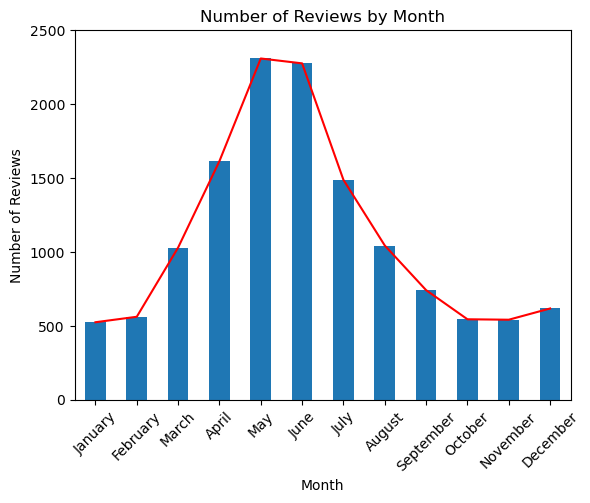

In [14]:
reviews_by_month_df.plot(x="month_name",y="count",kind="bar")
plt.plot(reviews_by_month_df["month_name"], reviews_by_month_df["count"], color="red")
plt.xticks(rotation=45)
plt.yticks(np.arange(0,3000,500))
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Month")
plt.legend().remove()
plt.show()

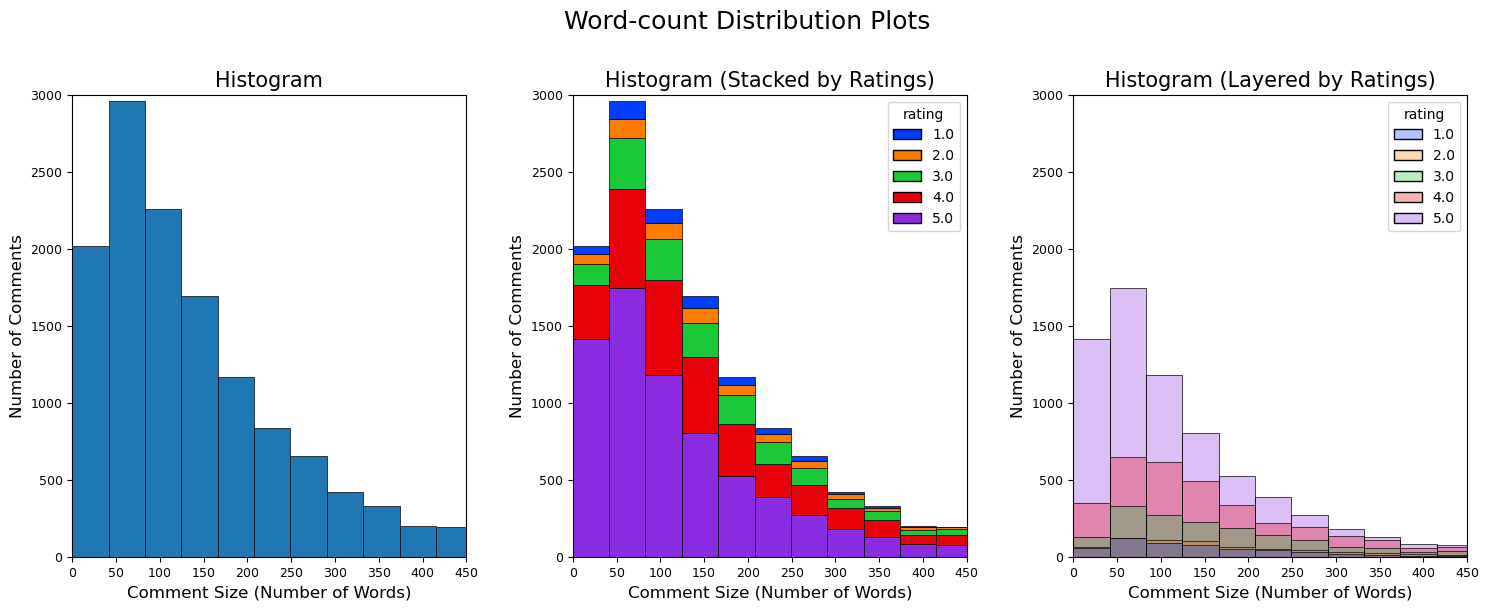

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i in range(3):
    if i == 0:
        alpha_value = 1
        title_str = "Histogram"
        hue=None
        palette=None
        multiple_value="layer"
    elif i == 1:
        multiple_value = 'stack'
        alpha_value = 1
        title_str = "Histogram (Stacked by Ratings)"
        hue='rating'
        palette='bright'
    else:
        multiple_value = 'layer'
        alpha_value = 0.3
        title_str = "Histogram (Layered by Ratings)"
        hue='rating'
        palette='bright'
        
    sns.histplot(ax=axes[i], data=df, x="word_count", bins=54, multiple=multiple_value, 
                     hue=hue, palette=palette, alpha=alpha_value)
    
    axes[i].set_ylabel("Number of Comments", fontsize=12)
    axes[i].set_xlabel("Comment Size (Number of Words)", fontsize=12)
    axes[i].set_title(title_str, fontsize=15)
    
    axes[i].set_xlim(0, 450)
    axes[i].set_ylim(0, 3_000)
    axes[i].set_yticks(np.arange(0, 3_500, 500))
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)
    
fig.text(x = 0.5, y = 0.99, s = "Word-count Distribution Plots", fontsize=18, ha='center')
fig.subplots_adjust(wspace=0.27)        
    

plt.show()

In [37]:
info_df = pd.read_csv("Reviews Info Data.csv")
display(info_df.head())

,reviewerID,asin,reviewerName,helpful,comment,rating,summary,unixReviewTime,reviewTime,month,year,word_count,sentiment,product,issue,product_clean,issue_clean
0,A2JCJJNY43QQIV,B000W8VCXY,Katy Lake,"[1, 1]",What a comfortable chair! Just the kind of thi...,5.0,Now we're set for summer!,1239840000,"04 16, 2009",4,2009,90,85,chair,setup,chair,setup
1,AI2XINIZFPBI8,B0052WJ3UY,"Kitty ""Kitty""","[1, 2]",This is the best product ever for planting in ...,5.0,Very Cool!,1308873600,"06 24, 2011",6,2011,106,95,liner,NaN,liner,NaN
2,A3JV4PJZD5O4NJ,B000PGOON8,"worddancer ""Perspicacious professor""","[0, 0]",This does work. It enables you to give your p...,3.0,Works okay. But probably not needed.,1342742400,"07 20, 2012",7,2012,67,55,waterer,cost,waterer,cost
3,ANOAFB0GOMU5C,B001GJ3FIS,"Vivian A. Robaldo ""Viv""","[0, 0]",Never expected it to work so well for the pric...,5.0,Great nozzle,1400198400,"05 16, 2014",5,2014,61,85,nozzle,NaN,nozzle,NaN
4,A3M7BCQKSQAK4L,B0096Q19YU,"Sally ""Sally""","[1, 1]",The idea behind this mouse trap is impressive-...,2.0,Haven't caught those critters yet,1368662400,"05 16, 2013",5,2013,264,30,trap,ineffective,trap,ineffective


In [17]:
info_df["scaled_sentiment"] = info_df.apply(lambda row: math.ceil(row["sentiment"] / 20), axis=1)
info_df["dif"] = info_df.apply(lambda row: abs(row["rating"] - row["scaled_sentiment"]), axis=1)
info_df[["scaled_sentiment", "rating","dif"]] = info_df[["scaled_sentiment", "rating","dif"]].astype(float)

In [18]:
crosstab_df = pd.crosstab(info_df["rating"], info_df["dif"])

np.random.seed(42)
max_jitter = 0.15
info_df["rating_jitter"] = info_df["rating"] + np.random.uniform(low=-max_jitter, high=max_jitter, size=len(info_df))

dif,0.0,1.0,2.0,3.0
rating,,,,
1.0,8,4,0,0
2.0,14,7,0,0
3.0,8,19,5,0
4.0,48,16,12,0
5.0,92,56,2,9


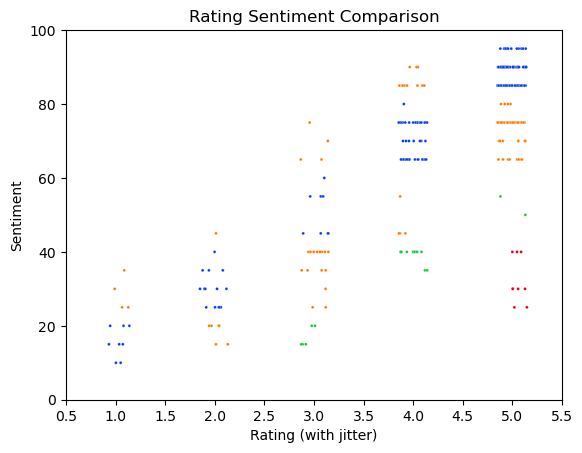

In [19]:
display(crosstab_df)

plt.figure()
sns.scatterplot(data=info_df, x="rating_jitter", y="sentiment", s=4.5, hue="dif", palette="bright")
plt.xlabel("Rating (with jitter)")
plt.ylabel("Sentiment")
plt.xticks(np.arange(0.5,6,0.5))
plt.yticks(np.arange(0,120,20))
plt.title("Rating Sentiment Comparison")
plt.legend().remove()
plt.show()

In [ ]:
info_df["issues_found"] = info_df["issue_clean"].apply(lambda x: "no" if x is np.nan else "yes")

pd.crosstab(info_df["issues_found"], info_df[""])

<class 'float'>


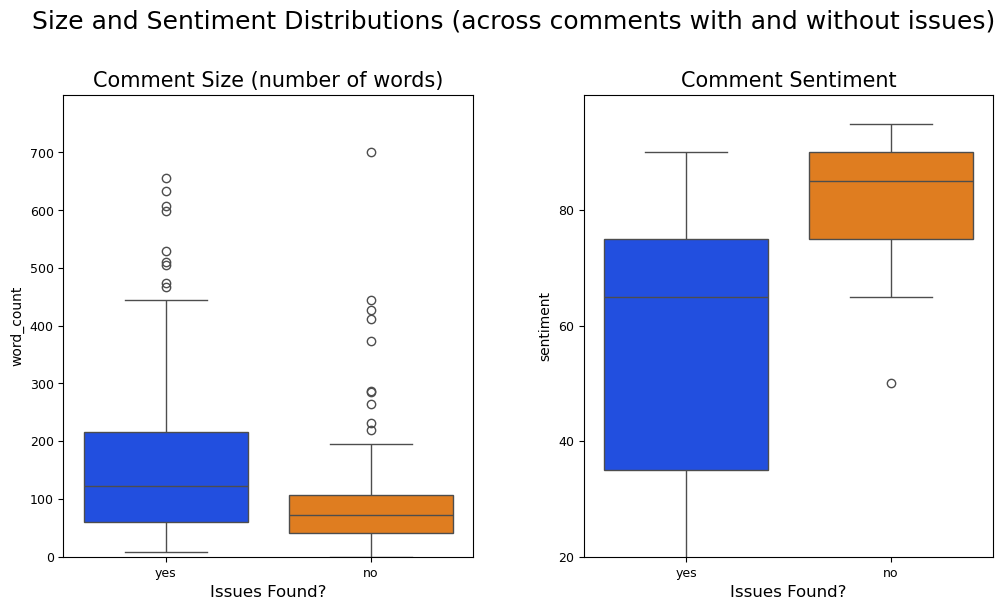

In [58]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

for i in range(2):
    if i == 0:
        title="Comment Size (number of words)"
        y="word_count"
        ymax=800
        ymin=0
        ystep=100
    else:
        title="Comment Sentiment"
        y="sentiment"
        ymax=100
        ymin=20
        ystep=20
        
    sns.boxplot(ax=axes[i], data=info_df, x="issues_found", y=y, palette="bright", hue="issues_found", legend=False)
    axes[i].set_xlabel("Issues Found?", fontsize=12)
    axes[i].set_title(title, fontsize=15)
    
    axes[i].set_ylim(ymin, ymax)
    axes[i].set_yticks(np.arange(ymin, ymax, ystep))
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)
    
fig.text(x = 0.5, y = 0.99, s = "Size and Sentiment Distributions (across comments with and without issues)", fontsize=18, ha='center')
fig.subplots_adjust(wspace=0.27)    

False